# LWCF Grant Funding in New England

The following analysis relies on grant information by state from 1965-2011 compiled by [Investigate West](http://www.invw.org/2012/06/11/lwcf-grants-database-1283/). There doesn't seem to be recent information. The Land and Water Conservation Fund (LWCF) [Project List by County and Summary Reports](https://waso-lwcf.ncrc.nps.gov/public/index.cfm) page is generally unresponsive and the latest Annual Report posted on nps.gov is from 2012.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [22]:
# Import data sets
ct_grants = pd.read_excel('./Data/CT_LWCFGrants1965-2011.xlsx')
me_grants = pd.read_excel('./Data/ME_LWCFGrants1965-2011.xlsx')
ma_grants = pd.read_excel('./Data/MA_LWCFGrants1965-2011.xlsx')
nh_grants = pd.read_excel('./Data/NH_LWCFGrants1965-2011.xlsx')
ri_grants = pd.read_excel('./Data/RI_LWCFGrants1965-2011.xlsx')
vt_grants = pd.read_excel('./Data/VT_LWCFGrants1965-2011.xlsx')

new_england = pd.concat([ct_grants, me_grants, ma_grants, nh_grants, ri_grants, vt_grants], ignore_index=True)

In [6]:
new_england.head()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
0,1 - XXX,SULLIVAN PROPERTY,DEPT. OF AGRICULTURE & NATURAL RESOU,HARTFORD,CT,5000.0,1965,1967,Acquisition
1,3 - XXX,ADELMAN FIELD,TOWN OF BOZRAH,MIDDLESEX,CT,3000.0,1965,1966,Acquisition
2,4 - XXX,STATE OUTDOOR RECREATION PLAN,DEPT. OF AGRICULTURE & NATURAL RESOU,PLANNING,CT,22500.0,1965,1966,Planning
3,5 - XXX,COUTU PROPERTY,TOWN OF MANSFIELD,TOLLAND,CT,300.0,1965,1967,Acquisition
4,2 - XXX,GOODWIN STATE FOREST,DEPT. OF AGRICULTURE & NATURAL RESOU,WINDHAM,CT,6000.0,1965,1967,Acquisition


In [7]:
new_england.tail()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
3255,626 - XXX,Grand Isle School Community Playground,Town of Grand Isle,GRAND ISLE,VT,34962.0,2011,2011,Development
3256,629 - XXX,Cabin Construction - Three State Parks,"State of Vermont, Dept.of Forests and Parks",MULTI-COUNTY,VT,153638.0,2011,2011,Development
3257,624 - XXX,Tunbridge Recreation Area Acquisition,Town of Tunbridge,ORANGE,VT,11035.0,2011,2011,Acquisition
3258,625 - XXX,Fair Haven Recreation Area and Playground,Town of Fair Haven,RUTLAND,VT,13000.0,2011,2011,Development
3259,627 - XXX,Chester Recreation - Community Pavilion Project,Town of Chester,WINDSOR,VT,17000.0,2011,2011,Development


In [8]:
new_england.shape

(3260, 9)

In [9]:
new_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 9 columns):
Grant ID & Element    3260 non-null object
Grant Name            3260 non-null object
Sponsor               3260 non-null object
County                3260 non-null object
State                 3260 non-null object
Grant Amount          3260 non-null float64
Year Approved         3260 non-null int64
Year Completed        3260 non-null int64
Type                  3260 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 229.3+ KB


In [10]:
new_england.describe()['Grant Amount']

count    3.260000e+03
mean     9.548901e+04
std      1.972163e+05
min      1.200000e-01
25%      1.507696e+04
50%      3.449163e+04
75%      9.000000e+04
max      2.596327e+06
Name: Grant Amount, dtype: float64

## Distribution and Outlier Analysis of Grant Amounts

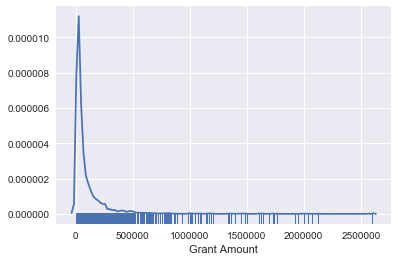

In [11]:
# Kernel density and rug plot of grant amounts
ne_grants = new_england['Grant Amount']  # save Grant Amount column as series
sns.distplot(ne_grants, hist=False, rug=True);

The kernel density plot for grant amounts shows a strongly right-skewed distribution, as also shown by the almost 3x difference between the mean (\$95,489) and median (\$34,491) values. Three-quarters of all grants are valued at \$90,000 or less, but the presence of multi-million grants pulls the mean value higher than the third quartile.

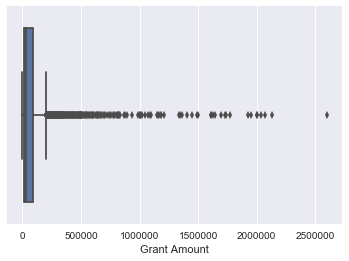

In [12]:
# Box plot of grant amounts to show outliers
sns.boxplot(ne_grants)

In [13]:
first_q = ne_grants.describe()['25%']
median = ne_grants.describe()['50%']
third_q = ne_grants.describe()['75%']
iqr = third_q - first_q
print('IQR: {0:.0f}'.format(iqr))
outlier_low = first_q - 1.5 * iqr
outlier_high = 1.5 * iqr + third_q
print('The threshold for a high grant amount outlier: ${0:.0f}'.format(outlier_high))
num_outliers = ne_grants[ne_grants > outlier_high].count()
print('Number of high grant amount outliers: {}'.format(num_outliers))

IQR: 74923
The threshold for a high grant amount outlier: $202385
Number of high grant amount outliers: 366


There are no low-end outliers (the first quartile less 1.5 times IQR is a negative number), but 366 high-end outliers. These are grant values above \$202,385, which is 1.5 times the interquartile range plus the third quartile amount. Out of the total data set of 3,260 observations, this is approximately 11% of the data set.

## Grant Analysis by State

In [14]:
# State Grant Totals in millions
total_grants = new_england.groupby('State').sum()['Grant Amount'] / 1000000
total_grants

State
CT    63.195093
MA    97.591917
ME    40.857039
NH    36.508412
RI    39.826280
VT    33.315420
Name: Grant Amount, dtype: float64

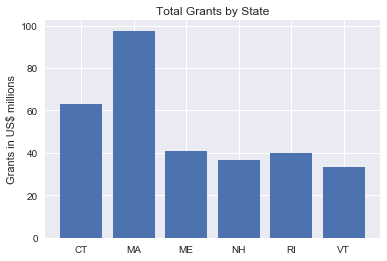

In [15]:
# Plot total grant amounts by state
states = ['CT', 'MA', 'ME', 'NH', 'RI', 'VT']
y_pos = np.arange(len(states))
plt.bar(y_pos, total_grants, align='center')
plt.xticks(y_pos, states)
plt.title('Total Grants by State')
plt.ylabel('Grants in US$ millions')

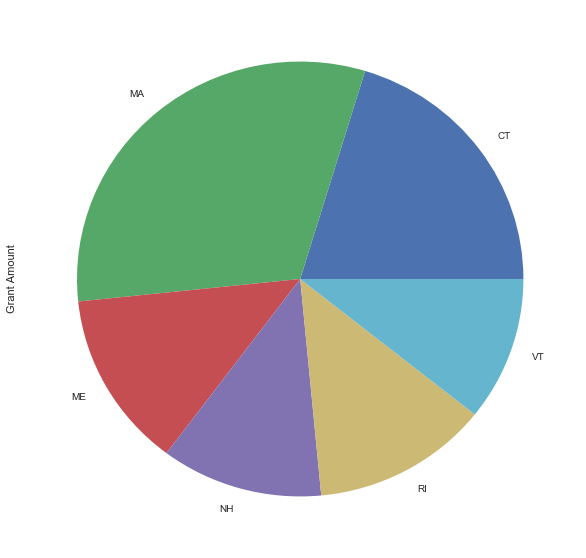

In [16]:
total_grants.plot(kind='pie', figsize=(10, 10));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e576a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e5d64e0>]], dtype=object)

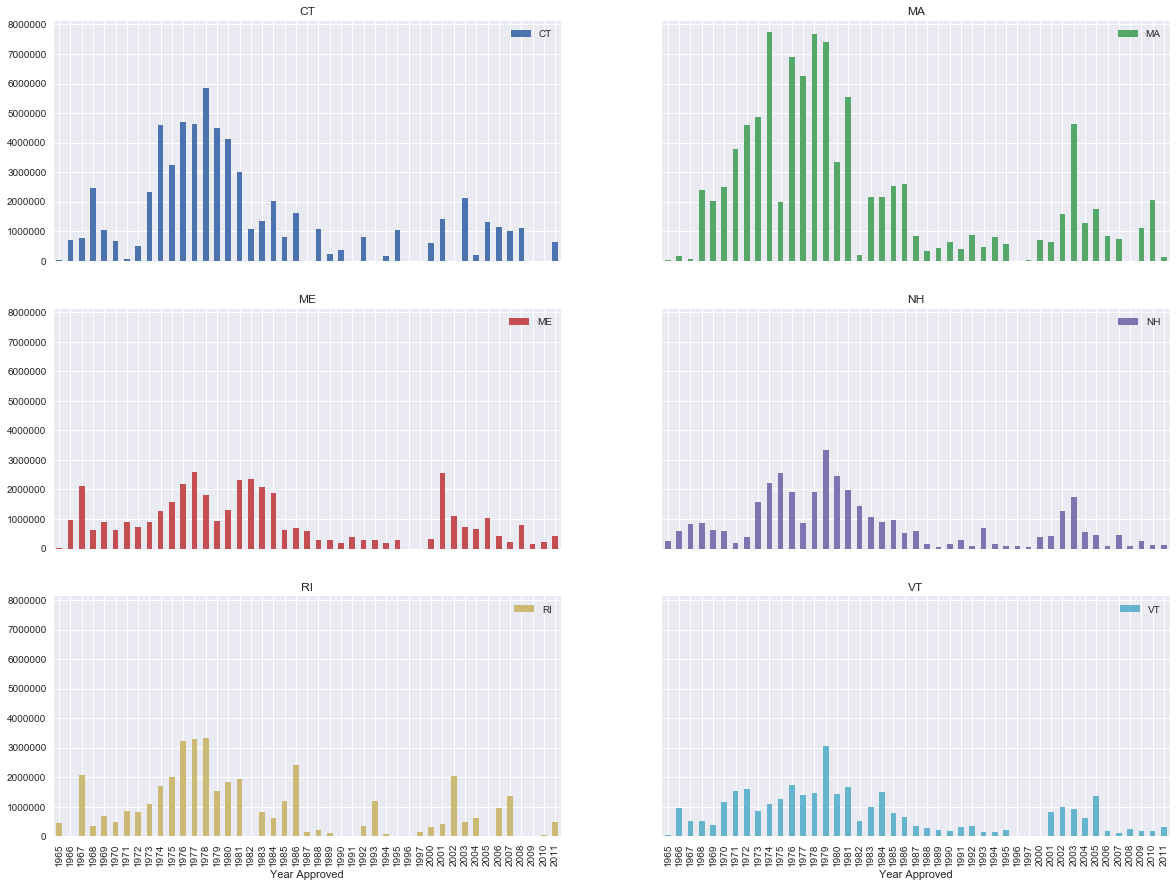

In [17]:
# Plot grant amount by year for each state
# Amounts determined by 'Year Approved' column
grants_by_year = []
for state in states:
    tmp = new_england[new_england['State'] == state].groupby('Year Approved').sum()['Grant Amount']
    grants_by_year.append(tmp)

df_grants_by_year = pd.concat(grants_by_year, axis=1)
df_grants_by_year.columns = states
df_grants_by_year.fillna(value=0, inplace=True)
# df_grants_by_year

df_grants_by_year.plot(kind='bar', subplots=True, layout=(3, 2), title=states, sharey=True, figsize=(20, 15))

In general, it appears that Massachusetts and Connecticut are the biggest beneficiares by dollar-amount of LWCF grants (they have larger populations than the other New England states - see the table below). Also, based on the annual grant amounts by year, the 1970's seem to be the golden years of investing in conservation project.

| State | Population |
| --- | --- |
| MA | 6,859,819 |
| CT | 3,576,452 |
| NH | 1,342,795 |
| ME | 1,331,479 |
| RI | 1,056,426 |
| VT |   624,594 |
Source: Wikipedia

In [18]:
# Breakdown of the number of each grant by type (for each state)
gt_num = new_england.groupby(['State', 'Type'])['Type'].count().unstack('Type').fillna(0)
gt_num

Type,Acquisition,Combination,Development,Planning,Redevelopment
State,,,,,
CT,199,9,114,9,43
MA,126,31,191,9,93
ME,152,77,476,29,97
NH,189,43,347,16,45
RI,77,14,204,15,26
VT,135,31,342,21,100


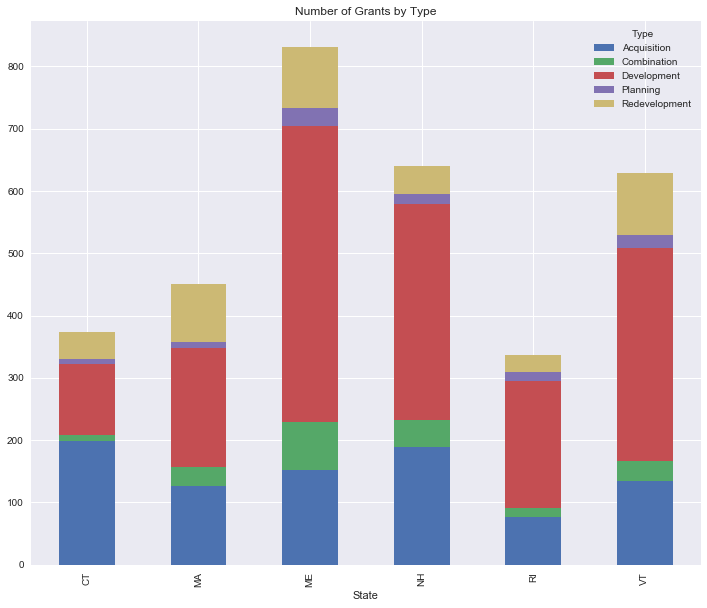

In [19]:
# Plot the number of grants by type
gt_num.plot(kind='bar', figsize=(12,10), title='Number of Grants by Type', stacked=True)

In [20]:
# Breakdown of the amount of each grant by type (for each state)
gt_amt = new_england.groupby(['State', 'Type'])['Grant Amount'].sum().unstack('Type') / 1000000
gt_amt

Type,Acquisition,Combination,Development,Planning,Redevelopment
State,,,,,
CT,32.279388,2.469008,21.795373,0.911663,5.739660
MA,29.470401,12.409701,36.422255,1.293133,17.996427
ME,10.707452,6.614504,18.218328,0.870131,4.446624
NH,10.118614,5.623054,17.101768,1.132974,2.532003
RI,6.549517,2.009323,24.080018,0.957441,6.229981
VT,9.617666,2.308353,16.240549,0.805994,4.342858


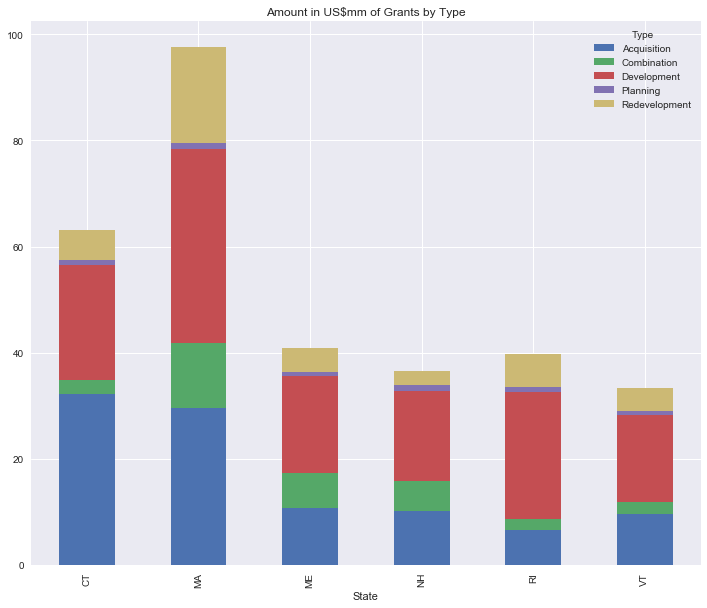

In [21]:
# Plot the dollar amount of grants by type
gt_amt.plot(kind='bar', figsize=(12,10), title='Amount in US$mm of Grants by Type', stacked=True)